<a href="https://colab.research.google.com/github/HarshKumarChoudary/AC-Data-Analysis/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 4**

We had to make predictions/forecasting of the given data set

Preparing data and resmapling it on days basis


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("/content/AC_Data.csv",parse_dates=['0'])
df.info()

for col in df.columns:
  df[col] = df[col].interpolate(method='linear',limit_direction='forward')
  
df = df.resample('1D',on = '0').mean().reset_index()

print(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87840 entries, 0 to 87839
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   0       87840 non-null  datetime64[ns]
 1   AC 1    43708 non-null  float64       
 2   AC 2    43711 non-null  float64       
 3   AC 3    43713 non-null  float64       
 4   AC 4    43704 non-null  float64       
 5   AC 5    43716 non-null  float64       
 6   AC 6    43717 non-null  float64       
 7   AC 7    43679 non-null  float64       
 8   AC 8    43704 non-null  float64       
 9   AC 9    43654 non-null  float64       
 10  AC 10   43690 non-null  float64       
 11  AC 11   43670 non-null  float64       
 12  AC 12   43713 non-null  float64       
 13  AC 13   43719 non-null  float64       
 14  AC 14   43696 non-null  float64       
 15  AC 15   43715 non-null  float64       
 16  AC 16   43710 non-null  float64       
 17  AC 17   43714 non-null  float64       
 18  AC 18 

In [9]:
df.head(1)

,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,Month,Year,Date,Time,Week,Day
0,2019-08-01,4.311251,7.19277,2.265914,3.320282,1.442006,2.799339,2.606838,3.261085,2.257789,1.761544,1.797694,2.539742,4.718219,3.061935,4.298479,3.620367,4.643621,7.561096,8,2019,2019-08-01,00:00:00,31,Thursday


[2019]
Total number of months are :  2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Power Distribution for AC 2')

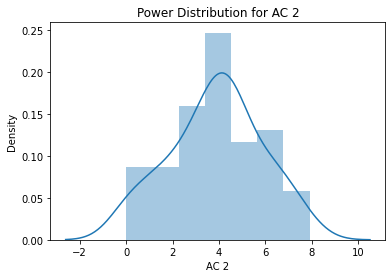

In [10]:
print(df.Year.unique())
print("Total number of months are : ", df.Month.nunique())
sns.distplot(dataset["AC 2"])
plt.title("Power Distribution for AC 2")

In [11]:
dataset = df
dataset["Month"] = pd.to_datetime(df["0"]).dt.month
dataset["Year"] = pd.to_datetime(df["0"]).dt.year
dataset["Date"] = pd.to_datetime(df["0"]).dt.date
dataset["Time"] = pd.to_datetime(df["0"]).dt.time
dataset["Week"] = pd.to_datetime(df["0"]).dt.week
dataset["Day"] = pd.to_datetime(df["0"]).dt.day_name()
dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,Month,Year,Date,Time,Week,Day
0,2019-08-01,4.311251,7.192770,2.265914,3.320282,1.442006,2.799339,2.606838,3.261085,2.257789,1.761544,1.797694,2.539742,4.718219,3.061935,4.298479,3.620367,4.643621,7.561096,8,2019,2019-08-01,00:00:00,31,Thursday
1,2019-08-02,3.977381,4.997287,2.910071,3.156393,1.638953,2.340743,2.334359,1.483584,2.635184,1.767480,2.011486,2.795197,5.123942,2.353536,4.470403,3.442106,4.444483,7.787343,8,2019,2019-08-02,00:00:00,31,Friday
2,2019-08-03,3.254814,4.291223,2.929456,1.902713,1.374562,2.555402,3.181457,1.283756,2.753423,1.462211,2.173384,3.077708,4.807019,1.865291,4.464468,2.929687,4.384711,7.883526,8,2019,2019-08-03,00:00:00,31,Saturday
3,2019-08-04,4.210091,4.451087,2.636284,1.582040,1.555314,3.614907,2.850690,1.591165,2.546160,1.730887,1.868694,3.080474,4.976188,2.242919,4.661893,2.927226,4.555513,8.381225,8,2019,2019-08-04,00:00:00,31,Sunday
4,2019-08-05,3.536980,4.008955,1.785850,0.910069,1.673115,3.793809,2.484910,1.642972,2.596842,1.423775,3.347532,3.107324,4.177918,2.795171,5.013642,3.466886,3.813778,6.106891,8,2019,2019-08-05,00:00:00,32,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2019-09-26,3.507869,4.147379,2.649227,3.374334,1.444154,2.301838,2.060002,2.278169,2.929070,1.457746,3.163686,2.494480,4.914755,2.816173,4.505642,2.578243,4.331568,6.372984,9,2019,2019-09-26,00:00:00,39,Thursday
57,2019-09-27,2.299397,3.281170,1.660224,2.620449,0.888126,2.355991,2.290790,2.892445,2.423409,1.258341,2.436058,2.531860,4.244210,2.705481,3.960751,2.213882,4.265494,6.890618,9,2019,2019-09-27,00:00:00,39,Friday
58,2019-09-28,1.187906,3.226275,1.856999,1.511555,1.301799,2.184178,1.872020,2.325760,2.441901,1.307919,1.822027,2.301743,3.182070,2.729225,3.126808,2.433880,3.242749,4.270624,9,2019,2019-09-28,00:00:00,39,Saturday
59,2019-09-29,1.133421,2.359928,2.291227,1.710210,1.020792,0.988985,1.869697,1.580643,2.647833,1.378947,1.936287,1.840926,3.127231,2.299264,2.768808,1.925555,3.440847,5.532254,9,2019,2019-09-29,00:00:00,39,Sunday


In [12]:
dataset = df.set_index("0")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(4)

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,Month,Year,Date,Time,Week,Day
0,,,,,,,,,,,,,,,,,,,,,,,,
2019-08-01,4.311251,7.192770,2.265914,3.320282,1.442006,2.799339,2.606838,3.261085,2.257789,1.761544,1.797694,2.539742,4.718219,3.061935,4.298479,3.620367,4.643621,7.561096,8,2019,2019-08-01,00:00:00,31,Thursday
2019-08-02,3.977381,4.997287,2.910071,3.156393,1.638953,2.340743,2.334359,1.483584,2.635184,1.767480,2.011486,2.795197,5.123942,2.353536,4.470403,3.442106,4.444483,7.787343,8,2019,2019-08-02,00:00:00,31,Friday
2019-08-03,3.254814,4.291223,2.929456,1.902713,1.374562,2.555402,3.181457,1.283756,2.753423,1.462211,2.173384,3.077708,4.807019,1.865291,4.464468,2.929687,4.384711,7.883526,8,2019,2019-08-03,00:00:00,31,Saturday
2019-08-04,4.210091,4.451087,2.636284,1.582040,1.555314,3.614907,2.850690,1.591165,2.546160,1.730887,1.868694,3.080474,4.976188,2.242919,4.661893,2.927226,4.555513,8.381225,8,2019,2019-08-04,00:00:00,31,Sunday


In [13]:
NewDataSet = dataset.resample('D').mean()
print("Old Dataset ", dataset.shape)
print("New Dataset ", NewDataSet.shape)

print(NewDataSet)

Old Dataset  (61, 24)
New Dataset  (61, 21)
                AC 1      AC 2      AC 3      AC 4  ...     AC 18  Month  Year  Week
0                                                   ...                             
2019-08-01  4.311251  7.192770  2.265914  3.320282  ...  7.561096      8  2019    31
2019-08-02  3.977381  4.997287  2.910071  3.156393  ...  7.787343      8  2019    31
2019-08-03  3.254814  4.291223  2.929456  1.902713  ...  7.883526      8  2019    31
2019-08-04  4.210091  4.451087  2.636284  1.582040  ...  8.381225      8  2019    31
2019-08-05  3.536980  4.008955  1.785850  0.910069  ...  6.106891      8  2019    32
...              ...       ...       ...       ...  ...       ...    ...   ...   ...
2019-09-26  3.507869  4.147379  2.649227  3.374334  ...  6.372984      9  2019    39
2019-09-27  2.299397  3.281170  1.660224  2.620449  ...  6.890618      9  2019    39
2019-09-28  1.187906  3.226275  1.856999  1.511555  ...  4.270624      9  2019    39
2019-09-29  1.133421 

Now we are going to derive Test Data from the newly generated dataset shown above. We are just doing Predictions on Values of **AC 1**

In [16]:
# taking last 40 rows out of 61 as our test data
TestData = NewDataSet.tail(40)
TestData = TestData.iloc[:,0:1]

# taking top 40 rows as training set our of 61
Training_Set = NewDataSet.iloc[:, 0:1]
Training_Set = Training_Set[:-21]

print(Training_Set)
print(TestData)

                AC 1
0                   
2019-08-01  4.311251
2019-08-02  3.977381
2019-08-03  3.254814
2019-08-04  4.210091
2019-08-05  3.536980
2019-08-06  3.394671
2019-08-07  3.257916
2019-08-08  4.992387
2019-08-09  3.502565
2019-08-10  1.307442
2019-08-11  1.052028
2019-08-12  0.773317
2019-08-13  0.052288
2019-08-14  0.351056
2019-08-15  0.000000
2019-08-16  1.078991
2019-08-17  2.174881
2019-08-18  4.050855
2019-08-19  1.801597
2019-08-20  2.206069
2019-08-21  3.420970
2019-08-22  3.253742
2019-08-23  2.351437
2019-08-24  1.266035
2019-08-25  0.000000
2019-08-26  0.016949
2019-08-27  1.813496
2019-08-28  4.560499
2019-08-29  3.688784
2019-08-30  2.479472
2019-08-31  3.226523
2019-09-01  2.408414
2019-09-02  0.981300
2019-09-03  0.000000
2019-09-04  0.000000
2019-09-05  0.560540
2019-09-06  2.013597
2019-09-07  1.949585
2019-09-08  0.504659
2019-09-09  0.022166
                AC 1
0                   
2019-08-22  3.253742
2019-08-23  2.351437
2019-08-24  1.266035
2019-08-25  0

In [17]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (40, 1)
Test Set Shape  (40, 1)


Going Ahead with Training set

In [18]:
Training_Set = Training_Set.values
Training_Set

array([[4.31125109],
       [3.977381  ],
       [3.25481434],
       [4.21009105],
       [3.53698003],
       [3.39467147],
       [3.25791582],
       [4.99238671],
       [3.50256537],
       [1.30744173],
       [1.05202774],
       [0.7733166 ],
       [0.05228817],
       [0.35105628],
       [0.        ],
       [1.07899075],
       [2.17488102],
       [4.05085469],
       [1.80159708],
       [2.20606938],
       [3.42096991],
       [3.25374207],
       [2.35143745],
       [1.26603456],
       [0.        ],
       [0.01694947],
       [1.81349589],
       [4.56049854],
       [3.68878384],
       [2.47947216],
       [3.22652349],
       [2.40841375],
       [0.9813001 ],
       [0.        ],
       [0.        ],
       [0.56054005],
       [2.01359665],
       [1.94958479],
       [0.50465879],
       [0.02216577]])

Preparing the training data

In [20]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)
Train

array([[0.86356513],
       [0.79668929],
       [0.65195557],
       [0.84330227],
       [0.70847477],
       [0.67996966],
       [0.65257682],
       [1.        ],
       [0.70158134],
       [0.26188711],
       [0.21072641],
       [0.15489918],
       [0.01047358],
       [0.07031833],
       [0.        ],
       [0.21612724],
       [0.43563953],
       [0.81140643],
       [0.3608689 ],
       [0.44188672],
       [0.68523736],
       [0.65174079],
       [0.47100467],
       [0.25359305],
       [0.        ],
       [0.00339506],
       [0.36325229],
       [0.91349064],
       [0.73888183],
       [0.49665066],
       [0.64628877],
       [0.48241731],
       [0.19655931],
       [0.        ],
       [0.        ],
       [0.11227897],
       [0.40333347],
       [0.39051157],
       [0.10108568],
       [0.00443992]])

In [21]:
Train.shape

(40, 1)

In [22]:
X_Train = []
Y_Train = []


for i in range(20, Train.shape[0]):
    X_Train.append(Train[i-20: i])
    Y_Train.append(Train[i])


X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(20, 20, 1)
(20, 1)


In [23]:
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(20, 20, 1)

Using Regression Method for Prediction Purposes


In [25]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

Using LSTM (a RNN) as a prediction model.

In [26]:
regressor = Sequential()

# Adding the first LSTM Layer and some dropout regularisation

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))


# Adding a second LSTM layer and some dropout regulatisation

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some dropout regularisation

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some dropout regularisation

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer

regressor.add(Dense(units = 1))

regressor.compile(optimizer = "adam", loss = "mean_squared_error")

Training model based on train data

In [27]:
regressor.fit(X_Train, Y_Train, epochs = 50, batch_size = 32)

Epoch 1/50
1/1 [==============================] - 10s 10s/step - loss: 0.2120
Epoch 2/50
1/1 [==============================] - 0s 79ms/step - loss: 0.1898
Epoch 3/50
1/1 [==============================] - 0s 74ms/step - loss: 0.1747
Epoch 4/50
1/1 [==============================] - 0s 79ms/step - loss: 0.1592
Epoch 5/50
1/1 [==============================] - 0s 83ms/step - loss: 0.1427
Epoch 6/50
1/1 [==============================] - 0s 79ms/step - loss: 0.1244
Epoch 7/50
1/1 [==============================] - 0s 86ms/step - loss: 0.1050
Epoch 8/50
1/1 [==============================] - 0s 79ms/step - loss: 0.0940
Epoch 9/50
1/1 [==============================] - 0s 86ms/step - loss: 0.0840
Epoch 10/50
1/1 [==============================] - 0s 77ms/step - loss: 0.1065
Epoch 11/50
1/1 [==============================] - 0s 75ms/step - loss: 0.1028
Epoch 12/50
1/1 [==============================] - 0s 92ms/step - loss: 0.0895
Epoch 13/50
1/1 [==============================] - 0s 74ms/st

Now Going to test data

In [29]:
TestData.head(2)

,AC 1
0,
2019-08-22,3.253742
2019-08-23,2.351437


In [30]:
TestData_Set = TestData.values
TestData_Set

array([[3.25374207],
       [2.35143745],
       [1.26603456],
       [0.        ],
       [0.01694947],
       [1.81349589],
       [4.56049854],
       [3.68878384],
       [2.47947216],
       [3.22652349],
       [2.40841375],
       [0.9813001 ],
       [0.        ],
       [0.        ],
       [0.56054005],
       [2.01359665],
       [1.94958479],
       [0.50465879],
       [0.02216577],
       [1.28480519],
       [4.61417377],
       [4.96187101],
       [3.67234014],
       [2.1294218 ],
       [2.80513877],
       [5.00268527],
       [5.02744885],
       [3.53146314],
       [4.117411  ],
       [3.67887185],
       [1.61934654],
       [1.01548506],
       [2.15863989],
       [2.74646471],
       [3.06693744],
       [3.50786856],
       [2.29939674],
       [1.18790629],
       [1.13342101],
       [1.5886066 ]])

In [34]:
Test = sc.fit_transform(TestData_Set)
Test

array([[0.64719546],
       [0.46771982],
       [0.25182445],
       [0.        ],
       [0.00337139],
       [0.36071891],
       [0.90711983],
       [0.73372877],
       [0.49318695],
       [0.64178147],
       [0.47905286],
       [0.19518848],
       [0.        ],
       [0.        ],
       [0.11149592],
       [0.40052057],
       [0.38778809],
       [0.10038069],
       [0.00440895],
       [0.25555808],
       [0.91779626],
       [0.98695604],
       [0.73045798],
       [0.42355912],
       [0.55796466],
       [0.99507433],
       [1.        ],
       [0.70243641],
       [0.81898616],
       [0.73175719],
       [0.32210105],
       [0.20198814],
       [0.42937083],
       [0.54629391],
       [0.61003852],
       [0.69774326],
       [0.4573685 ],
       [0.23628411],
       [0.22544655],
       [0.31598663]])

In [36]:
x_test = []
for i in range(20, 40):
    x_test.append(Test[i-20:i])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_units = regressor.predict(x_test)

predicted_units = sc.inverse_transform(predicted_units)
predicted_units

array([[1.7021794],
       [1.6753052],
       [1.6583527],
       [1.6546807],
       [1.6660066],
       [1.6823007],
       [1.6914217],
       [1.6889949],
       [1.7030705],
       [1.7337853],
       [1.764197 ],
       [1.8037244],
       [1.8522475],
       [1.901902 ],
       [1.9430594],
       [1.971598 ],
       [1.9830098],
       [1.9899514],
       [2.0017505],
       [2.010491 ]], dtype=float32)

In [48]:
True_values = TestData[20:].values
True_values

array([[4.61417377],
       [4.96187101],
       [3.67234014],
       [2.1294218 ],
       [2.80513877],
       [5.00268527],
       [5.02744885],
       [3.53146314],
       [4.117411  ],
       [3.67887185],
       [1.61934654],
       [1.01548506],
       [2.15863989],
       [2.74646471],
       [3.06693744],
       [3.50786856],
       [2.29939674],
       [1.18790629],
       [1.13342101],
       [1.5886066 ]])